<a href="https://colab.research.google.com/github/software-artisan/YoloV3/blob/master/Session_5_TorchText/S5_TorchText_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from torchtext.datasets import IMDB

In [2]:
help(IMDB)

Help on function IMDB in module torchtext.datasets.imdb:

IMDB(root='.data', split=('train', 'test'))
    IMDB dataset
    
    Separately returns the train/test split
    
    Number of lines per split:
        train: 25000
    
        test: 25000
    
    
    Number of classes
        2
    
    
    Args:
        root: Directory where the datasets are saved.
            Default: .data
        split: split or splits to be returned. Can be a string or tuple of strings.
            Default: ('train', 'test')



In [3]:
train_iter = IMDB(split='train')

100%|██████████| 84.1M/84.1M [00:00<00:00, 89.6MB/s]


In [4]:
type(IMDB(split='train'))

torchtext.data.datasets_utils._RawTextIterableDataset

In [5]:
next(train_iter)

('neg',
 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

neg I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between,

<BarContainer object of 2 artists>

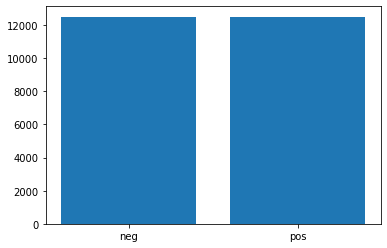

In [4]:
num_neg:int=0; num_pos:int=0
for (line_number, (label, line)) in enumerate(train_iter):
  if line_number < 19:
    print(label, line)
  if label == 'neg': num_neg = num_neg + 1
  if label == 'pos': num_pos = num_pos + 1

import matplotlib.pyplot as pyplot
pyplot.bar(x=['neg', 'pos'], height=[num_neg, num_pos])

  


type(test_iter)=<class 'torchtext.data.datasets_utils._RawTextIterableDataset'>
next(test_iter)=('neg', 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions

<BarContainer object of 2 artists>

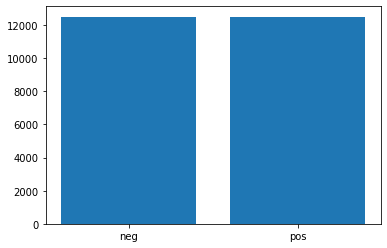

In [9]:
from IPython.core.debugger import set_trace

test_iter = IMDB(split='test')
print(f"type(test_iter)={type(test_iter)}")
print(f"next(test_iter)={next(test_iter)}")
num_neg:int=0; num_pos:int=0;
for (line_number, (label, line)) in enumerate(test_iter):
  #set_trace()
  if label == "neg": 
    num_neg = num_neg + 1
    if num_neg <= 2: print(label, line)
  elif label == "pos": 
    num_pos = num_pos + 1
    if num_pos <= 2: print(label, line)

import matplotlib.pyplot as pyplot
pyplot.bar(x=['neg','pos'], height=[num_neg, num_pos])

In [10]:
from torch.utils.data import DataLoader
train_iter = IMDB(split = 'train')

help(DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(typing.Generic)
 |  DataLoader(*args, **kwds)
 |  
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Args:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have the data reshuffled
 |          at every epoch (default: ``False``).
 |      sampler (Sampler or Iterable, optional): defines the strategy to draw
 |          samples from the dataset. Can be any ``Iterable``

In [12]:
dataloader:DataLoader = DataLoader(train_iter, batch_size=8, shuffle=False)

In [9]:
next(iter(dataloader))

[('neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg'),
 ('I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. 

In [13]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

In [11]:
help(get_tokenizer)

Help on function get_tokenizer in module torchtext.data.utils:

get_tokenizer(tokenizer, language='en')
    Generate tokenizer function for a string sentence.
    
    Args:
        tokenizer: the name of tokenizer function. If None, it returns split()
            function, which splits the string sentence by space.
            If basic_english, it returns _basic_english_normalize() function,
            which normalize the string first and split by space. If a callable
            function, it will return the function. If a tokenizer library
            (e.g. spacy, moses, toktok, revtok, subword), it returns the
            corresponding library.
        language: Default en
    
    Examples:
        >>> import torchtext
        >>> from torchtext.data import get_tokenizer
        >>> tokenizer = get_tokenizer("basic_english")
        >>> tokens = tokenizer("You can now install TorchText using pip!")
        >>> tokens
        >>> ['you', 'can', 'now', 'install', 'torchtext', 'using

In [14]:
tokenizer = get_tokenizer("basic_english")

In [13]:
tokens = tokenizer("You can now install TorchText using pip!")
tokens

['you', 'can', 'now', 'install', 'torchtext', 'using', 'pip', '!']

In [14]:
help(build_vocab_from_iterator)

Help on function build_vocab_from_iterator in module torchtext.vocab.vocab_factory:

build_vocab_from_iterator(iterator: Iterable, min_freq: int = 1, specials: Union[List[str], NoneType] = None, special_first: bool = True) -> torchtext.vocab.vocab.Vocab
    Build a Vocab from an iterator.
    
    Args:
        iterator: Iterator used to build Vocab. Must yield list or iterator of tokens.
        min_freq: The minimum frequency needed to include a token in the vocabulary.
        specials: Special symbols to add. The order of supplied tokens will be preserved.
        special_first: Indicates whether to insert symbols at the beginning or at the end.
    
    
    Returns:
        torchtext.vocab.Vocab: A `Vocab` object
    
    Examples:
        >>> #generating vocab from text file
        >>> import io
        >>> from torchtext.vocab import build_vocab_from_iterator
        >>> def yield_tokens(file_path):
        >>>     with io.open(file_path, encoding = 'utf-8') as f:
        >>> 

In [35]:
tokenizer = get_tokenizer("basic_english")
train_iter = IMDB(split = 'train')

def yield_tokens(data_iter):
  for _, text in data_iter:
    yield tokenizer(text)

import torchtext.vocab
# https://pytorch.org/text/stable/vocab.html#vocab
vocab:torchtext.vocab.Vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])

print(f"type(vocab)={type(vocab)}")
print(f"len(vocab)={len(vocab)}")
print(f"vocab.lookup_token(1)={vocab.lookup_token(1)}; vocab.lookup_token(100682)={vocab.lookup_token(100682)}")
print(f"vocab.lookup_indices([\"rented\"])={vocab.lookup_indices(['rented'])};  vocab['<unk>']={vocab['<unk>']}")
# to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, even then it\'s not shot like some cheaply made porno. While my countrymen mind find it shocking, in reality sex and nudity are a major staple in Swedish cinema. Even Ingmar Bergman, arguably their answer to good old boy John Ford, had sex scenes in his films.<br /><br />I do commend the filmmakers for the fact that any sex shown in the film is shown for artistic purposes rather than just to shock people and make money to be shown in pornographic theaters in America. I AM CURIOUS-YELLOW is a good film for anyone wanting to study the meat and potatoes (no pun intended) of Swedish cinema. But really, this film doesn\'t have much of a plot.
print(f"={vocab(tokenizer('I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered controversial I really had '))}")


vocab.lookup_indices(["rented"])=[1567];  vocab['<unk>']=0


In [ ]:
#help(vocab)

In [39]:
vocab.set_default_index(vocab["<unk>"])

In [18]:
vocab(['here', 'is', 'an', 'example', 'of', 'alien', 'invasion', 'they', 'are', 'called', 'bangalorites'])

[131, 9, 40, 464, 6, 1494, 4604, 38, 30, 493, 0]

In [19]:
vocab["<unk>"]

0

In [42]:
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: 0 if x == "neg" else 1

In [40]:
text_pipeline("Here is an exmaple of alient invasion, and they are called bangaloriters")

[131, 9, 40, 0, 6, 0, 4604, 3, 4, 38, 30, 493, 0]

In [44]:
label_pipeline('19')

1

In [45]:
from torch.utils.data import DataLoader
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def collate_fn(batch):
  src_batch, tgt_batch = [], []
  for src_batch, tgt_batch in batch:
    src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip('\n')))
    tgt_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip('\n')))
  src_batch = pad_sequences(src_batch, padding_value=PAD_IDX)
  tgt_batch = pad_sequences(tgt_batch, padding_value=PAD_IDX)
  return src_batch, tgt_batch

In [46]:
weight = torch.randn(10, 5)
weight

tensor([[-2.0420, -1.0560,  0.3430, -0.5797, -0.7521],
        [-1.3785, -0.7233,  1.2211,  1.6693, -0.4833],
        [-0.2552, -1.4835, -0.5269, -1.4473, -0.5173],
        [-0.4813,  1.3364, -0.9104,  1.0711, -1.7365],
        [-0.1817, -2.0890, -0.1375,  0.3435, -0.8850],
        [ 0.7730, -0.0723,  0.6842,  2.7505,  1.4196],
        [-0.5429,  1.1646, -0.3273, -2.4905, -0.5571],
        [-0.5912, -0.0710, -0.2616,  0.6510,  0.7130],
        [ 1.4411, -0.5878,  0.3038, -1.7752,  0.1380],
        [-1.3022, -0.8695,  0.8380, -1.5674,  2.0068]])

In [47]:
indices = torch.tensor([4, 1, 7])
indices

tensor([4, 1, 7])

In [48]:
embeddings = torch.nn.functional.embedding(indices, weight)
embeddings

tensor([[-0.1817, -2.0890, -0.1375,  0.3435, -0.8850],
        [-1.3785, -0.7233,  1.2211,  1.6693, -0.4833],
        [-0.5912, -0.0710, -0.2616,  0.6510,  0.7130]])

In [49]:
embeddings.mean(dim=0, keepdim=True)

tensor([[-0.7171, -0.9611,  0.2740,  0.8879, -0.2184]])

In [50]:
torch.nn.functional.embedding_bag(indices, weight, torch.tensor([0]), mode="mean")

tensor([[-0.7171, -0.9611,  0.2740,  0.8879, -0.2184]])

In [51]:
def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
         label_list.append(label_pipeline(_label))
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)    

In [52]:
train_iter = IMDB(split='train')
dataloader = DataLoader(train_iter, batch_size=8, shuffle=False, collate_fn=collate_batch)

In [53]:
from torch import nn

class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

1: Negative, 2: Positive

In [73]:
train_iter = IMDB(split='train')
num_class = len(set([label for (label, text) in train_iter]))
vocab_size = len(vocab)
emsize = 64
print(f"Creating TextClassificationModel with vocab_size={vocab_size}, embed_dim={emsize}, num_class={num_class}")
model:TextClassificationModel = TextClassificationModel(vocab_size=vocab_size, embed_dim=emsize, num_class=num_class).to(device)

# from torchsummary import summary
# summary(model=model, input_size=[[64, vocab_size]])
# summary(model.cuda(), (INPUT_SHAPE))
print(model)

TextClassificationModel(
  (embedding): EmbeddingBag(100683, 64, mode=mean)
  (fc): Linear(in_features=64, out_features=2, bias=True)
)


In [55]:
import time
from tqdm import tqdm
from IPython.core.debugger import set_trace

def train(dataloader, epoch, total_epochs, total_batches):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 50
    start_time = time.time()


    pbar = tqdm(dataloader)

    for idx, (label, text, offsets) in enumerate(pbar):
        optimizer.zero_grad()
        predited_label = model(text, offsets)

        # if we are in the last epoch and last few batches
        #if epoch == total_epochs and (idx+1) >= total_batches:
          #set_trace()
        loss = criterion(predited_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1) # disuccees
        optimizer.step()
        total_acc += (predited_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            # print('| epoch {:3d} | {:5d}/{:5d} batches '
            #       '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
            #                                   total_acc/total_count))
            pbar.set_description(desc= f'epoch= {epoch} Accuracy={total_acc/total_count} batch_id={idx}')
            total_acc, total_count = 0, 0
            start_time = time.time()

def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predited_label = model(text, offsets)
            loss = criterion(predited_label, label)
            total_acc += (predited_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

In [56]:
from torch.utils.data.dataset import random_split
from torchtext.data.functional import to_map_style_dataset

# Hyperparameters
EPOCHS = 2 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training
  
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None
train_iter, test_iter = IMDB()
train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)
num_train = int(len(train_dataset) * 0.95)
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader, epoch, EPOCHS, int(25000*0.95/BATCH_SIZE)+1)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
  
    print('validation accuracy {:8.3f} '.format(accu_val))
    

epoch= 1 Accuracy=0.7159375 batch_id=350: 100%|██████████| 372/372 [00:05<00:00, 67.93it/s]


validation accuracy    0.736 


epoch= 2 Accuracy=0.794375 batch_id=350: 100%|██████████| 372/372 [00:05<00:00, 70.52it/s]


validation accuracy    0.810 


In [57]:
print('Checking the results of test dataset.')
accu_test = evaluate(test_dataloader)
print('test accuracy {:8.3f}'.format(accu_test))

Checking the results of test dataset.
test accuracy    0.798


In [59]:
imdb_label = {1: "Negative",
                 2: "Positive"}

def predict(text, text_pipeline):
    with torch.no_grad():
        text = torch.tensor(text_pipeline(text))
        output = model(text, torch.tensor([0]))
        return output.argmax(1).item() + 1

ex_text_strs = [
["negative", "Worth the entertainment value of a rental, especially if you like action movies. This one features the usual car chases, fights with the great Van Damme kick style, shooting battles with the 40 shell load shotgun, and even terrorist style bombs. All of this is entertaining and competently handled but there is nothing that really blows you away if you've seen your share before.<br /><br />The plot is made interesting by the inclusion of a rabbit, which is clever but hardly profound. Many of the characters are heavily stereotyped -- the angry veterans, the terrified illegal aliens, the crooked cops, the indifferent feds, the bitchy tough lady station head, the crooked politician, the fat federale who looks like he was typecast as the Mexican in a Hollywood movie from the 1940s. All passably acted but again nothing special.<br /><br />I thought the main villains were pretty well done and fairly well acted. By the end of the movie you certainly knew who the good guys were and weren't. There was an emotional lift as the really bad ones got their just deserts. Very simplistic, but then you weren't expecting Hamlet, right? The only thing I found really annoying was the constant cuts to VDs daughter during the last fight scene.<br /><br />Not bad. Not good. Passable 4."],
["negative", "its a totally average film with a few semi-alright action sequences that make the plot seem a little better and remind the viewer of the classic van dam films. parts of the plot don't make sense and seem to be added in to use up time. the end plot is that of a very basic type that doesn't leave the viewer guessing and any twists are obvious from the beginning. the end scene with the flask backs don't make sense as they are added in and seem to have little relevance to the history of van dam's character. not really worth watching again, bit disappointed in the end production, even though it is apparent it was shot on a low budget certain shots and sections in the film are of poor directed quality"],
["positive", "Previous reviewer Claudio Carvalho gave a much better recap of the film's plot details than I could. What I recall mostly is that it was just so beautiful, in every sense - emotionally, visually, editorially - just gorgeous.<br /><br />If you like movies that are wonderful to look at, and also have emotional content to which that beauty is relevant, I think you will be glad to have seen this extraordinary and unusual work of art.<br /><br />On a scale of 1 to 10, I'd give it about an 8.75. The only reason I shy away from 9 is that it is a mood piece. If you are in the mood for a really artistic, very romantic film, then it's a 10. I definitely think it's a must-see, but none of us can be in that mood all the time, so, overall, 8.75."],
["positive", "CONTAINS \"SPOILER\" INFORMATION. Watch this director's other film, \"Earth\", at some point. It's a better film, but this one isn't bad just different.<br /><br />A rare feminist point of view from an Indian filmmaker. Tradition, rituals, duty, secrets, and the portrayal of strict sex roles make this an engaging and culturally dynamic film viewing experience. All of the married characters lack the \"fire\" of the marriage bed with their respective spouses. One husband is celibate and commits a form of spiritual \"adultery\" by giving all of his love, honor, time and respect to his religious swami (guru). His wife is lonely and yearns for intimacy and tenderness which she eventually finds with her closeted lesbian sister-in-law who comes to live in their house with her unfaithful husband. This unfaithful husband is openly in love with his Chinese mistress but was forced into marriage with a (unbeknownest to him) lesbian. They only have sex once when his closet lesbian wife loses her virginity.<br /><br />A servant lives in the house and he eventually reveals the secret that the two women are lovers. Another significant character is the elderly matriarch who is unable to speak or care for herself due to a stroke. However, she uses a ringing bell to communicate her needs as well as her displeasure with the family members. She lets them know through her bell or by pounding her fist that she knows exacly what's going on in the house and how much she disapproves.<br /><br />In the end, the truth about everybody comes out and the two female lovers end up running away together. But, not before there is an emotional scene between the swami-addicted husband and his formerly straight wife. Her sari catches on fire and at first we think she is going to die. However, we see the two women united in the very last scene of the movie.<br /><br />The writer/director of this film challenges her culture's traditions, but she shows us individual human beings who are trapped by their culture and gender. We come to really care about the characters and we don't see them as stereotypes. Each on surprises us with their humanity, vulgarity, tenderness, anger, and spirit."]
]

model = model.to("cpu")
for (gt, ex_text_str) in ex_text_strs:
  print(f"ground truth={gt}; prediction={imdb_label[predict(ex_text_str, text_pipeline)]}; ex_text_str={ex_text_str} " )

ground truth=negative; prediction=Negative; ex_text_str=Worth the entertainment value of a rental, especially if you like action movies. This one features the usual car chases, fights with the great Van Damme kick style, shooting battles with the 40 shell load shotgun, and even terrorist style bombs. All of this is entertaining and competently handled but there is nothing that really blows you away if you've seen your share before.<br /><br />The plot is made interesting by the inclusion of a rabbit, which is clever but hardly profound. Many of the characters are heavily stereotyped -- the angry veterans, the terrified illegal aliens, the crooked cops, the indifferent feds, the bitchy tough lady station head, the crooked politician, the fat federale who looks like he was typecast as the Mexican in a Hollywood movie from the 1940s. All passably acted but again nothing special.<br /><br />I thought the main villains were pretty well done and fairly well acted. By the end of the movie you